<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-10-20 03:25:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  36.8MB/s    in 0.9s    

2024-10-20 03:25:12 (36.8 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [56]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
data=pd.read_sql_query(QUERY,conn)
data.head()

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan


In [70]:
QUERY = """
SELECT  DevType, count(DevType) as nb 
FROM DevType
group by DevType
order by nb desc
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
data=pd.read_sql_query(QUERY,conn)
data.head()

,DevType,nb
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959


## Demo: How to run a group by query


In [53]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn).head()

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [8]:
# your code goes here
QUERY = """
SELECT ConvertedComp
FROM master
"""
ConvertedComp=pd.read_sql_query(QUERY,conn)

(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

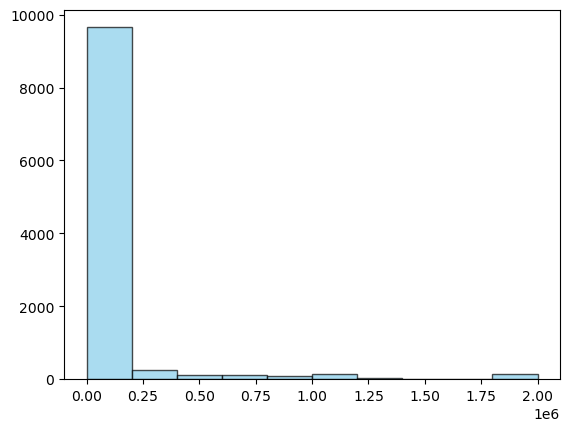

In [9]:
import matplotlib.pyplot as plt
plt.hist(ConvertedComp, alpha=0.7, color='skyblue', edgecolor='black')


### Box Plots


Plot a box plot of `Age.`


In [11]:
# your code goes here
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn).head()


,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78


In [12]:
QUERY = """
SELECT Age
FROM master
"""
age=pd.read_sql_query(QUERY,conn)
age.head()

,Age
0,22.0
1,23.0
2,28.0
3,26.0
4,29.0


In [13]:
print(age['Age'].isna().sum())
mean_age=age['Age'].mean()
age['Age'] = age['Age'].fillna(mean_age)
print(age['Age'].isna().sum())

287
0


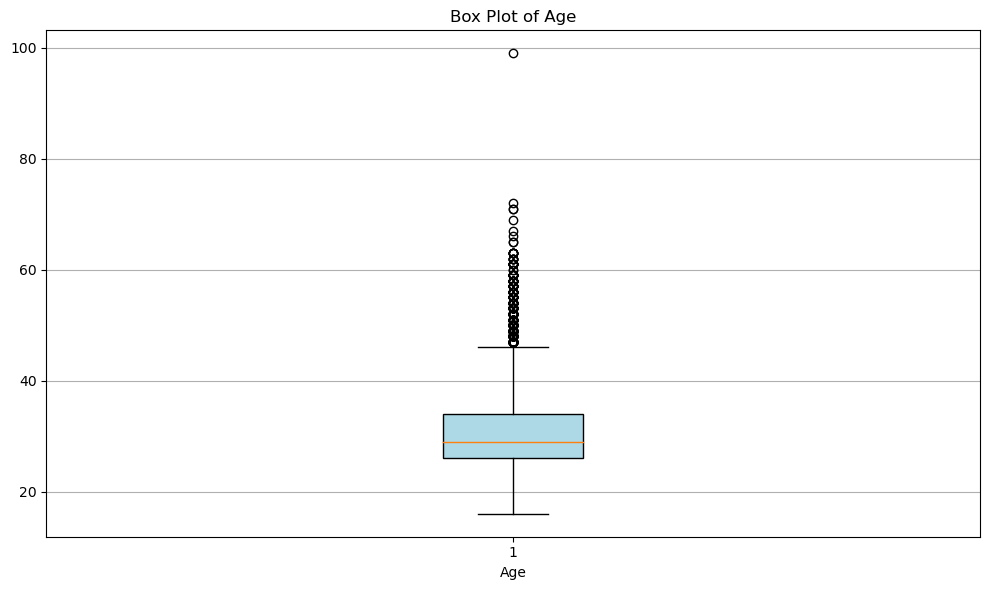

In [14]:
# Créer le box plot pour la colonne Age

plt.figure(figsize=(10, 6))
plt.boxplot(age['Age'], patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Add titles and labels
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(axis='y')  # Add a grid on the y-axis
plt.tight_layout()  # Adjust the layout

# Show the plot
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


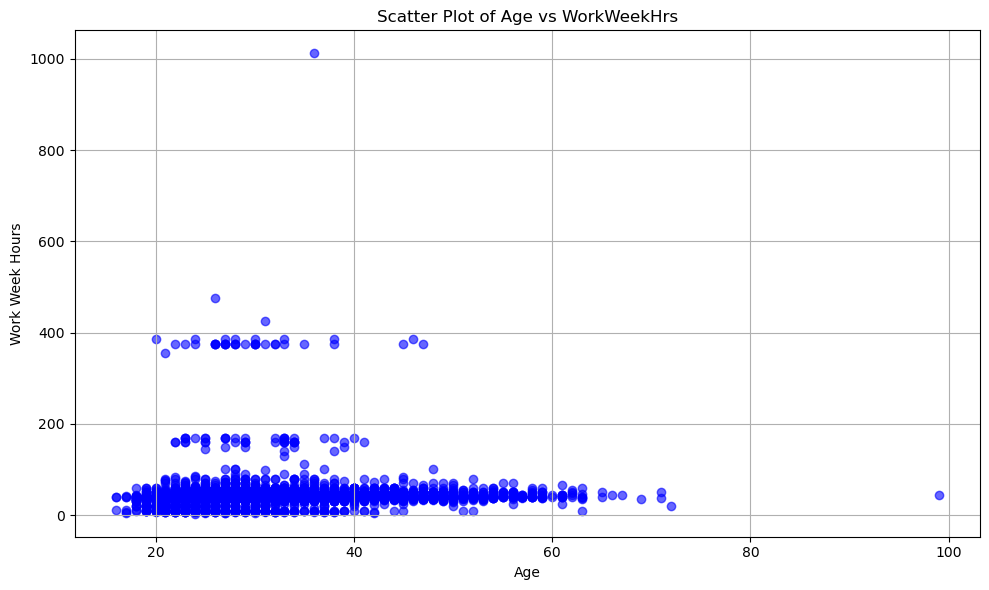

In [15]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs
FROM master
"""
data=pd.read_sql_query(QUERY,conn)

# Create a scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['WorkWeekHrs'], color='blue', alpha=0.6)

# Add titles and labels
plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()



### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


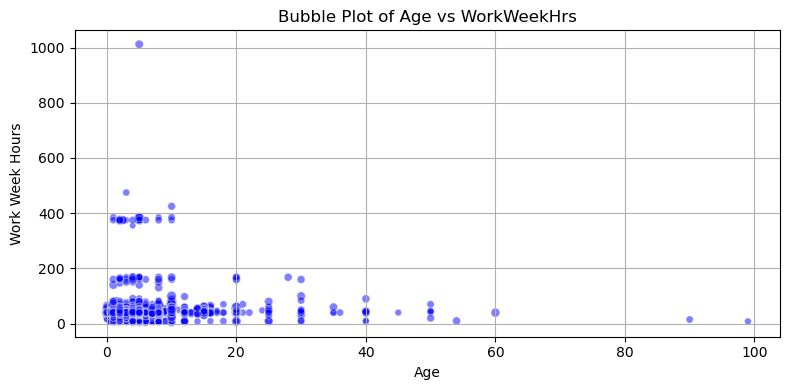

In [16]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
"""
data=pd.read_sql_query(QUERY,conn)

# Create a bubble plot
plt.figure(figsize=(8, 4))
bubble = plt.scatter(data['CodeRevHrs'], data['WorkWeekHrs'], 
                     s=data['Age'],  # Scale size of bubbles
                     alpha=0.5, 
                     c='blue',  # Color of the bubbles
                     edgecolors='w',  # Edge color
                     linewidth=0.5)

# Add titles and labels
plt.title('Bubble Plot of Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [17]:
# your code goes here

table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])



CREATE TABLE "DatabaseDesireNextYear" (
"Respondent" INTEGER,
  "DatabaseDesireNextYear" TEXT
)


In [19]:

QUERY = """
SELECT DatabaseDesireNextYear, count(DatabaseDesireNextYear) nb
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear order by nb desc 
"""
data=pd.read_sql_query(QUERY,conn) 
#pd.set_option('display.max_columns')

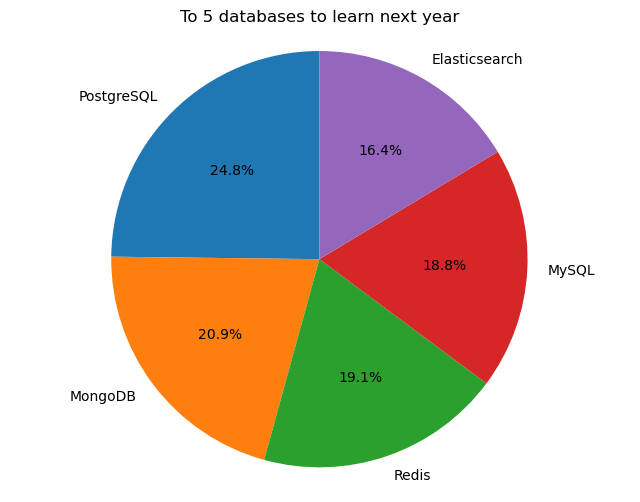

In [20]:
plt.figure(figsize=(8, 6))
top5=data.head()
plt.pie(top5['nb'], labels=top5['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('To 5 databases to learn next year')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


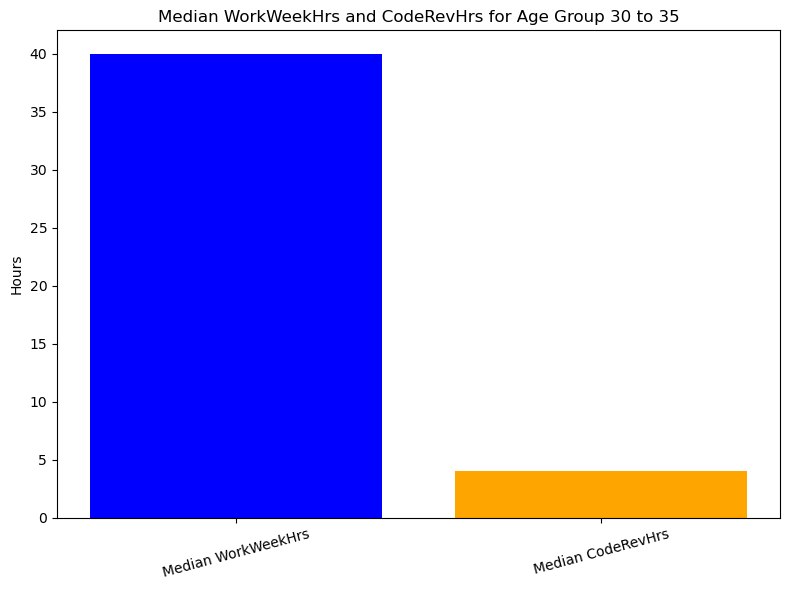

In [21]:
# your code goes here

QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
"""
data=pd.read_sql_query(QUERY,conn)
filtered_data = data[(data['Age'] >= 30) & (data['Age'] <= 35)]

# Calculate the median WorkWeekHrs and CodeRevHrs
median_workweekhrs = filtered_data['WorkWeekHrs'].median()
median_coderevhrs = filtered_data['CodeRevHrs'].median()

# Prepare data for the stacked bar chart
median_values = [median_workweekhrs, median_coderevhrs]
labels = ['Median WorkWeekHrs', 'Median CodeRevHrs']

# Create the stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, median_values, color=['blue', 'orange'])

# Add titles and labels
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35')
plt.ylabel('Hours')
plt.xticks(rotation=15)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


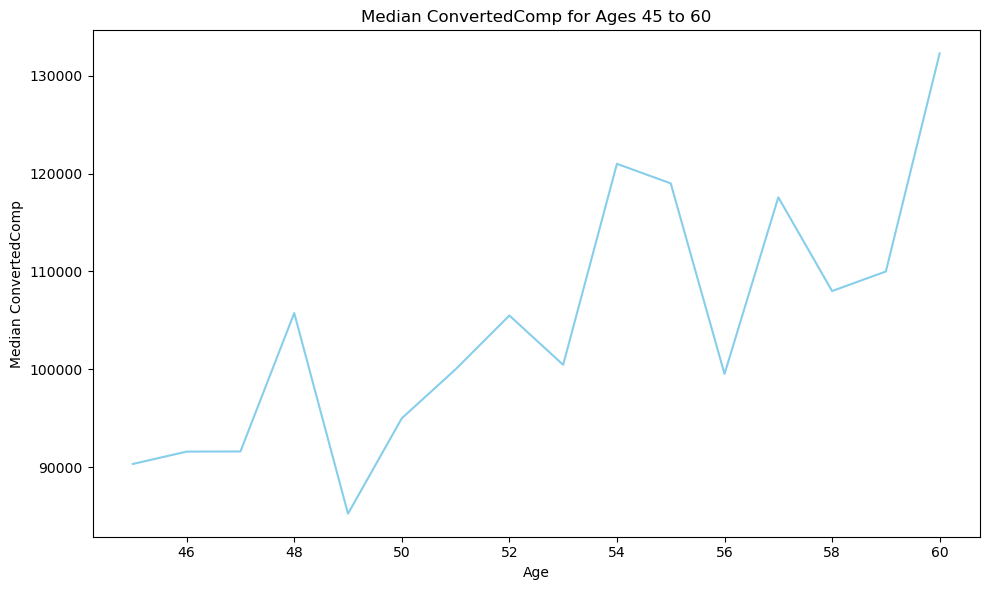

In [23]:
# your code goes here

# Define your SQL query to fetch relevant columns
QUERY = "SELECT Age, ConvertedComp FROM master"  # Adjust as needed

# Load the data into a DataFrame
data = pd.read_sql_query(QUERY, conn)

# Filter the DataFrame for ages 45 to 60
filtered_data = data[(data['Age'] >= 45) & (data['Age'] <= 60)]

# Calculate the median ConvertedComp for each age
median_convertedcomp = filtered_data.groupby('Age')['ConvertedComp'].median()

# Create the plot
plt.figure(figsize=(10, 6))
median_convertedcomp.plot(kind='line', color='skyblue')

# Add titles and labels
plt.title('Median ConvertedComp for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


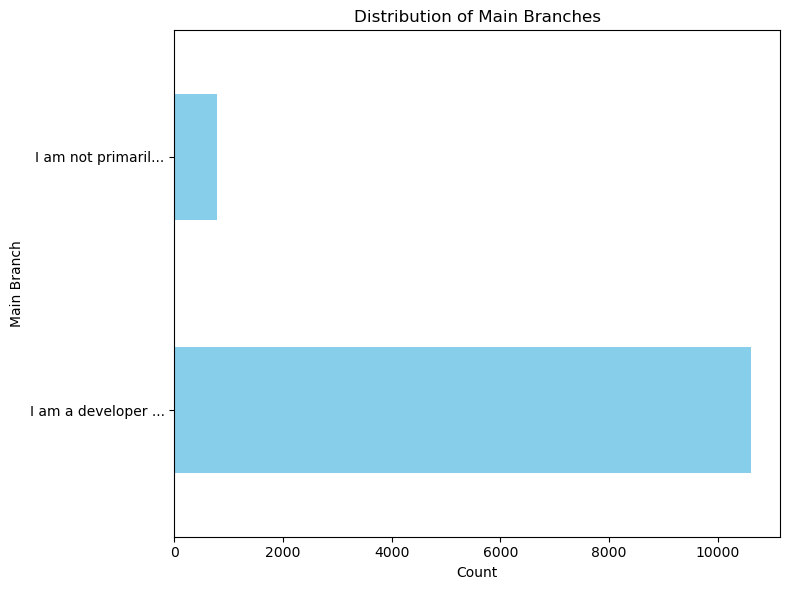

In [24]:
# your code goes here
# Define your SQL query to fetch relevant columns
QUERY = "SELECT MainBranch FROM master"
data = pd.read_sql_query(QUERY, conn)
mainbranch_counts = data['MainBranch'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
#diminuer le label trop long
truncated_labels = [label if len(label) <= 20 else label[:17] + '...' for label in mainbranch_counts.index]
mainbranch_counts.plot(kind='barh', color='skyblue')
plt.yticks(ticks=range(len(truncated_labels)), labels=truncated_labels, fontsize=10)

# Add titles and labels
plt.title('Distribution of Main Branches')
plt.xlabel('Count')
plt.ylabel('Main Branch')

# Show the plot
plt.tight_layout()
plt.show()


Close the database connection.


In [25]:
conn.close()

In [26]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [27]:
QUERY = """
SELECT LanguageDesireNextYear, count('LanguageDesireNextYear') nb
FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by nb desc

"""
data=pd.read_sql_query(QUERY,conn)
data.head()

,LanguageDesireNextYear,nb
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


In [28]:

QUERY = """
SELECT LanguageWorkedWith, count('LanguageWorkedWith') nb
FROM LanguageWorkedWith
group by LanguageWorkedWith
order by nb desc

"""
data=pd.read_sql_query(QUERY,conn)
data.head()

,LanguageWorkedWith,nb
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542


In [30]:

QUERY = """
SELECT Respondent, DatabaseWorkedWith
FROM DatabaseWorkedWith


"""
db=pd.read_sql_query(QUERY,conn)
db.head()

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite


In [31]:
table_name = 'DatabaseWorkedWith'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "DatabaseWorkedWith" (
"Respondent" INTEGER,
  "DatabaseWorkedWith" TEXT
)


In [45]:
QUERY = """
SELECT DISTINCT Respondent
FROM DatabaseWorkedWith
where DatabaseWorkedWith ='MySQL'

"""
df = pd.read_sql_query(QUERY,conn)
df.shape

(5469, 1)

In [46]:
#like
QUERY = """
SELECT DISTINCT Respondent
FROM DatabaseWorkedWith
where DatabaseWorkedWith like '%MySQL%'

"""
df = pd.read_sql_query(QUERY,conn)
df.shape

(5469, 1)

In [49]:
QUERY = """
SELECT *
FROM DatabaseWorkedWith

"""
df = pd.read_sql_query(QUERY,conn)
df.head(10)

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite
5,13,Couchbase
6,13,DynamoDB
7,13,Firebase
8,13,MySQL
9,16,MongoDB


In [52]:
#combine
QUERY = """
SELECT Respondent
FROM DatabaseWorkedWith
where DatabaseWorkedWith ='MySQL'
and Respondent not in (
SELECT DISTINCT Respondent
FROM DatabaseWorkedWith
where lower(DatabaseWorkedWith) !='mysql'

)

"""
df = pd.read_sql_query(QUERY,conn)
df.shape


(474, 1)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
